I got the following code and information from https://www.sdss.org/dr16/irspec/spectro_data/#SummaryCatalogs

# Finding Red Giants

Imports and Variable/Strings

In [2]:
import numpy
from astropy.io import fits 
star_hdus = fits.open('../../data/allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()
badbits = 2**23
gd = (numpy.bitwise_and(star['aspcapflag'], badbits) == 0) & (star['extratarg']==0)
ind = numpy.where(gd)[0] 

In [5]:
#!/usr/bin/env python
# coding: utf-8

import fitsio
from matplotlib import pyplot as plt
import numpy as np
data = fitsio.read("../../data/allStar-r12-l33.fits")

starbad = 2**23 #bit flag for bad stars 
gd = np.bitwise_and(data["ASPCAPFLAG"], starbad) == 0 
teff_logg_check = np.logical_and(data["TEFF"] > 0, data["LOGG"] > -10) # this checks for -9999 values
teff_logg_feh_check = np.logical_and(data["FE_H"]> -6, teff_logg_check)

indices = np.where(np.logical_and(gd, teff_logg_feh_check)) 
good = data[indices] # this only the good data now
Teff_vals = good["TEFF"]
logg_vals = good["LOGG"]
FeH_vals = good["FE_H"]

ModuleNotFoundError: No module named 'pfits'

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import fitsio
from matplotlib import pyplot as plt
import numpy as np
data = fitsio.read("allStar-r12-l33.fits")

starbad = 2**23 #bit flag for bad stars 
gd = np.bitwise_and(data["ASPCAPFLAG"], starbad) == 0 
teff_logg_check = np.logical_and(data["TEFF"] > 0, data["LOGG"] > -10) # this checks for -9999 values
teff_logg_feh_check = np.logical_and(data["FE_H"]> -6, teff_logg_check)

indices = np.where(np.logical_and(gd, teff_logg_feh_check)) 
good = data[indices] # this only the good data now
Teff_vals = good["TEFF"]
logg_vals = good["LOGG"]
FeH_vals = good["FE_H"]

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [3]:
#clusters=[['ngc 2419',12],['Pal 3',12],['Pal 4',12],['ngc 4147',12],['ngc 5024',12],['M53',12],['ngc 5053',12],['ngc 5272',12]
#      ,['M3',12],['ngc 5466',12],['Pal 5',12],['ngc 5904',12],['M5',12],['Pal 14',12],['ngc 6205',12],['M13',12],
#     ['ngc 6341',12],['M92',12],['ngc 6838',12],['M71',12],['ngc 7006',12],['ngc 7078',12],['M15',12],['ngc 7089',12],['M2',12]]
clusters=[['ngc 2419',2.92],['Pal 3',6.18],['Pal 4',2]]

print(len(clusters))
i=2
print(clusters[i])

sclus=clusters[i]
print(sclus[0])
print(sclus[1])

3
['Pal 4', 2]
Pal 4
2


In [4]:

rgs=[['119 Tau',12]]
#clusters=[['ngc 2419',2.92],['Pal 3',6.18],['Pal 4',2]]

print(len(clusters))
i=2
print(clusters[i])

sclus=clusters[i]
print(sclus[0])
print(sclus[1])

3
['Pal 4', 2]
Pal 4
2


In [5]:
radeg= [None] * len(clusters)
decdeg= [None] * len(clusters)
i=0
for clus in clusters:
    #print(clus)
    print(clus[0])
    #print(clus[1])
    clus_center = SkyCoord.from_name(clus[0])
    #print(clus_center.ra, clus_center.dec)
    #print(clus_center.ra.hour, clus_center.dec)
    print(str(clus_center.ra.deg), str(clus_center.dec.deg))
    radeg[i]=clus_center.ra.deg
    decdeg[i]=clus_center.dec.deg
    i=i+1
    clus[1]=10
    
    #im_size = clus[1]*u.arcmin 
    #im_pixels = 1024 
    #cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
    #query_string = urlencode(dict(ra=clus_center.ra.deg, 
    #                          dec=clus_center.dec.deg, 
    #                          width=im_pixels, height=im_pixels, 
    #                          scale=im_size.to(u.arcsec).value/im_pixels))
    #url = cutoutbaseurl + '?' + query_string

    # this downloads the image to your disk
    #urlretrieve(url, 'PAL3_SDSS_cutout.jpg')
    #imfilename='rgout/'+clus[0]+'.jpg'
    #urlretrieve(url, imfilename)

ngc 2419
114.53545833 38.88191667
Pal 3
151.379 0.07094444
Pal 4
172.32 28.97361111


In [6]:
from astroquery.sdss import SDSS
from astropy.io import ascii

q1 = " select s.objid, s.ra, s.dec, s.u, s.g, s.r, s.i, s.z from star s, "
q3 = "  n where s.objid = n.objid "
i=0
for clus in clusters:
    #query = "select top 10                        z, ra, dec, bestObjID                      from                        specObj                      where                        class = 'galaxy'                        and z > 0.3                        and zWarning = 0"
    #query = " select s.objid, s.ra, s.dec, s.u, s.g, s.r, s.i, s.z from star s, dbo.fGetNearbyObjEq(229.0128,-0.1082,3) n where s.objid = n.objid "
    q2 = " dbo.fGetNearbyObjEq("+str(radeg[i])+","+str(decdeg[i])+",8) "
    query = q1+q2+q3
    i=i+1
    res = SDSS.query_sql(query)
    outfile='rgout/'+clus[0]+'.csv'
    ascii.write(res,outfile)

In [7]:
print(res)


       objid               ra              dec        ...    i        z    
------------------- ---------------- ---------------- ... -------- --------
1237667211061494090 172.369967527838 29.0236005393859 ... 22.61952 23.56167
1237667211061494136 172.386704992373 29.0307274729142 ... 21.45578 21.82044
1237667211061428989 172.313453285795 29.0264308006407 ... 24.18897 22.98672
1237667211061428529 172.289952965803 28.9676028090411 ... 24.75321 22.10135
1237667211061428781 172.254031273266 28.9916126912156 ... 22.63018 22.95296
1237667211061428782 172.252826641857 29.0063031628907 ...  20.5558 20.25026
1237667211061429021 172.326295355013 28.9812876813423 ... 23.30231  21.6746
1237667211061429187 172.247155029476 28.9867173329159 ...  21.8872 21.53875
1237667211061429188 172.246735591307 28.9877879603331 ... 21.88823 21.33899
1237667211061429195  172.26238489532 28.9848477420672 ... 22.25725  20.9816
                ...              ...              ... ...      ...      ...
123766725347

In [8]:
print (res[1])

       objid               ra              dec           u        g        r        i        z    
------------------- ---------------- ---------------- -------- -------- -------- -------- --------
1237667211061494136 172.386704992373 29.0307274729142 23.09132 22.22349 21.89649 21.45578 21.82044


In [9]:
print(res[1][2])
print(len(res))

29.0307274729142
565


In [35]:
from astropy.table import QTable, Table, Column

clussize=len(res)
rgtab = Table(names=('objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z'),dtype=('int32', 'float64','float64', 'float64','float64','float64', 'float64','float64'))
startab = Table(names=('objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z'),dtype=('int32', 'float64','float64', 'float64','float64','float64', 'float64','float64'))
bigtab = Table(names=('objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z'),dtype=('int32', 'float64','float64', 'float64','float64','float64', 'float64','float64'))

# t = Table(names=('a', 'b', 'c'), dtype=('f4', 'i4', 'S2'))
for i in range(clussize):
    bigtab.add_row(res[i])
#for i in range(5):
    g=res[i][4]
    r=res[i][5]
    u=res[i][3]
    if g-r>0.8 and g-r<1.3:
        if u-g>0.84*(g-r)+1.758:
            if u-g<2.4*(g-r)+0.73:
                print("about time!")
                rgtab.add_row(res[i])
            else:
                startab.add_row(res[i])

                
        
    

about time!
about time!
about time!
about time!
about time!
about time!
about time!
about time!
about time!
about time!
about time!


In [36]:
print(startab)

  objid           ra              dec        ...    r        i        z    
---------- ---------------- ---------------- ... -------- -------- --------
1635188881 172.319576533073 28.9781239884233 ... 17.55418 17.05704 16.72677
1635189442 172.290314997256 29.0768615004526 ...  20.2567 19.77213 19.46344
1098187332 172.350187216945   28.85797359111 ... 20.38039 19.75166 19.29156
1098186872 172.321432450547 28.9664477297099 ... 17.37736 16.83035 16.53284
1098186873  172.32095298957 28.9642750365345 ... 17.57538 17.04726  16.7629
1098186973 172.295609806615 28.9306269624967 ... 20.37102 18.87312 18.13255


In [28]:
#We will make a loop over all the clusters and find more
#red giants that arent a billion lightyears away.

In [ ]:
#method is in globularcluster_plothr_loop

In [37]:
import pandas as pd
import numpy as np
import matplotlib

# Third-party dependencies
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import ascii

from IPython.display import Image

# Set up matplotlib and use a nicer set of plot parameters
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
tbl = Table(names=('objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z'), dtype=('int32', 'float64','float64', 'float64','float64','float64', 'float64','float64'))
tbl=pd.read_csv('rgout/'+clusters[2][0]+'.csv',sep=' ')

In [29]:
print(clusters[2][0])

Pal 4


Text(0.5, 1.0, 'H-R Diagram for Pal 3 Cluster')

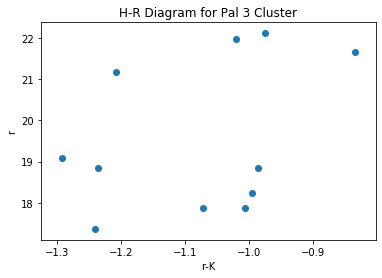

In [51]:
tab=rgtab

tab["objid"]
rmag = tab["r"]
grcolor = tab["r"]-tab["g"]

#plt.subplot(1, 2, 1)
plt.scatter(grcolor, rmag)
plt.xlabel('r-K')
plt.ylabel('r')
plt.title('H-R Diagram for Pal 3 Cluster')
#plt.xlim(2.5, 4)
#plt.ylim(18, 12) #mags go backwards!

In [48]:
#print(tab)
#newbigtable=join(res[0],res[1], join_type='left')
#print(newbigtable)
nstars=(len(bigtab))
maxgrcolor2=max(bigtab[4][:]-bigtab[5][:])
mingrcolor2=min(bigtab[4][:]-bigtab[5][:])
maxrmag2=max(bigtab[5][:])
minrmag2=min(bigtab[5][:])

print(maxgrcolor2)
print(mingrcolor2)
print(maxrmag2)
print(minrmag2)
print()
#print(newbigtable[10000][8])
mingrcolor2=-8

#set scale to compare M3 cluster with 
maxgrcolor2=4.7
mingrcolor2=-3
maxrmag2=26
minrmag2=12


4.659420000000001
-2.964489999999998
26.44181
12.44638



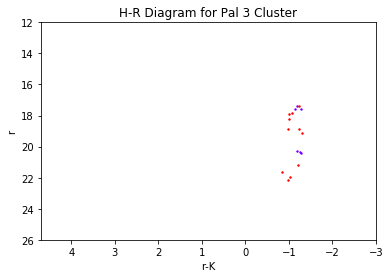

In [52]:

colors = cm.rainbow(np.linspace(0, 1, 2))

startab["objid"]
rmag = startab["r"]
grcolor = startab["r"]-startab["g"]
c=colors[0]
#plt.subplot(1, 2, 1)
plt.scatter(grcolor, rmag,s=2,color=c)


#plt.xlim(max(grcolor2[i]), min(grcolor2[i]))
#plt.xlim(maxgrcolor2,mingrcolor2)
#plt.ylim(maxrmag2, minrmag2)
#plt.show()

plt.xlabel('r-K')
plt.ylabel('r')
plt.title('H-R Diagram for Pal 3 Cluster')
#plt.xlim(2.5, 4)
#plt.ylim(18, 12) #mags go backwards!

c=colors[1]
rgtab["objid"]
rmag = rgtab["r"]
grcolor = rgtab["r"]-rgtab["g"]

#plt.subplot(1, 2, 1)
plt.scatter(grcolor, rmag,s=2,color=c)
plt.xlim(maxgrcolor2,mingrcolor2)
plt.ylim(maxrmag2, minrmag2)
plt.show()


In [43]:
import matplotlib.cm as cm
i=0
#colors = np.random.rand(len(clusters))
rmag2 = 2*[None] 
grcolor2 = 2*[None]
colors = cm.rainbow(np.linspace(0, 1, 2))
print(colors[0])
#colmaps = ['Blues', 'Greys', 'Reds']
#plt.figure()

for i in range(2):
    c=colors[i]
    cres=res[i]
    rmag2[i] = cres[5][:]
    grcolor2[i] = cres[4][:] -cres[5][:]
    #print(rmag2)
    #print(grcolor2)
    
    
    plt.figure(i)
    plt.scatter(grcolor2[i], rmag2[i],s=1,color=c)
    plt.xlabel('r-K')
    plt.ylabel('r')
    thetitle='H-R Diagram for '+clus[0]+' Cluster'
    plt.title(thetitle)
    
    #plt.xlim(max(grcolor2[i]), min(grcolor2[i]))
    plt.xlim(maxgrcolor2,mingrcolor2)
    plt.ylim(maxrmag2, minrmag2)
    plt.show()
    i=i+1


[0.5 0.  1.  1. ]


IndexError: invalid index to scalar variable.